In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline




In [70]:
# fastai.__version__

In [3]:

from fastai.imports import *
from fastai.tabular  import *
import fastai.tabular.core 
from fastai.data.all import *


import fastai.torch_core

from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display

from sklearn import metrics

from pandas import DatetimeIndex



In [4]:

%load "fastai/structured.py"
%run "fastai/structured.py"


In [5]:
PATH = "data/bulldozers/"

In [74]:
{PATH}

{'data/bulldozers/'}

In [6]:
df_raw = pd.read_csv(f'{PATH}Train.csv',low_memory=False,parse_dates=["saledate"])

In [76]:
df_raw

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401120,6333336,10500,1840702,21439,149,1.0,2005,NaN,NaN,2011-11-02,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
401121,6333337,11000,1830472,21439,149,1.0,2005,NaN,NaN,2011-11-02,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
401122,6333338,11500,1887659,21439,149,1.0,2005,NaN,NaN,2011-11-02,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
401123,6333341,9000,1903570,21435,149,2.0,2005,NaN,NaN,2011-10-25,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN


In [8]:
# replace a column with its log
#log(x) is natural logarithm of x - logs is a simpler way o express larges values

df_raw['SalePrice'] = np. log(df_raw.SalePrice)

In [9]:

df_raw.SalePrice

0         11.097410
1         10.950807
2          9.210340
3         10.558414
4          9.305651
            ...    
401120     9.259131
401121     9.305651
401122     9.350102
401123     9.104980
401124     8.955448
Name: SalePrice, Length: 401125, dtype: float64

In [10]:
df_raw.saledate.head()


0   2006-11-16
1   2004-03-26
2   2004-02-26
3   2011-05-19
4   2009-07-23
Name: saledate, dtype: datetime64[ns]

In [65]:
# add_datepart(df_raw,'saledate')

In [11]:
fld =  df_raw.saledate

In [46]:
# add_datepart(df_raw,'saledate')

In [77]:
# Get the year and the month and the day from datatime

# df_raw['saleYear'] = df_raw['saledate'].dt.year
# df_raw['saleMonth'] = df_raw['saledate'].dt.month
# df_raw['saleWeek'] = df_raw['saledate'].dt.week
# df_raw['saleDay'] = df_raw['saledate'].dt.day

# Series.dt.isocalendar().week 
# df_raw = df_raw.drop('saleYear', 1)
#df_raw.columns



In [12]:
# Create all the date fields
fastai.tabular.core.add_datepart(df_raw,'saledate')
df_raw.saleYear.head()

0    2006
1    2004
2    2004
3    2011
4    2009
Name: saleYear, dtype: int64

In [85]:
# see all the columns in the datafield
df_raw.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc', 'fiModelSeries',
       'fiModelDescriptor', 'ProductSize', 'fiProductClassDesc', 'state',
       'ProductGroup', 'ProductGroupDesc', 'Drive_System', 'Enclosure',
       'Forks', 'Pad_Type', 'Ride_Control', 'Stick', 'Transmission',
       'Turbocharged', 'Blade_Extension', 'Blade_Width', 'Enclosure_Type',
       'Engine_Horsepower', 'Hydraulics', 'Pushblock', 'Ripper', 'Scarifier',
       'Tip_Control', 'Tire_Size', 'Coupler', 'Coupler_System',
       'Grouser_Tracks', 'Hydraulics_Flow', 'Track_Type',
       'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb', 'Pattern_Changer',
       'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type', 'Travel_Controls',
       'Differential_Type', 'Steering_Controls', 'saleYear', 'saleMonth',
       'saleWeek', 'saleDay', 'saleDayofweek', 'saleDayofyear',


In [82]:
#Apply Randon Forest
m = RandomForestRegressor(n_jobs = -1)
m.fit(df_raw.drop('SalePrice',axis=1), df_raw.SalePrice)

ValueError: could not convert string to float: 'Low'

In [35]:
# the categorical variables are stored as strings, which is inefficient, and doesn't provide 
# the numeric coding required for a random forest. Therefore we call train_cats to convert strinf tp pandas categries.False



In [13]:
#creates categorical variables - store a mapping from strings
#python has something like this too
# no change will be seen in the dataframe, it is in the background
train_cats(df_raw)

In [14]:
df_raw.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,saleDay,saleDayofweek,saleDayofyear,saleIs_month_end,saleIs_month_start,saleIs_quarter_end,saleIs_quarter_start,saleIs_year_end,saleIs_year_start,saleElapsed
0,1139246,11.097410,999089,3157,121,3.0,2004,68.0,Low,521D,...,16,3,320,False,False,False,False,False,False,1.163635e+09
1,1139248,10.950807,117657,77,121,3.0,1996,4640.0,Low,950FII,...,26,4,86,False,False,False,False,False,False,1.080259e+09
2,1139249,9.210340,434808,7009,121,3.0,2001,2838.0,High,226,...,26,3,57,False,False,False,False,False,False,1.077754e+09
3,1139251,10.558414,1026470,332,121,3.0,2001,3486.0,High,PC120-6E,...,19,3,139,False,False,False,False,False,False,1.305763e+09
4,1139253,9.305651,1057373,17311,121,3.0,2007,722.0,Medium,S175,...,23,3,204,False,False,False,False,False,False,1.248307e+09


In [15]:
# check the order of categories - it doesn't matter too much - when we choose random forest it 
# will treat them as 0 1 2, you 
df_raw.UsageBand.cat.categories


Index(['High', 'Low', 'Medium'], dtype='object')

In [16]:
df_raw.UsageBand.cat.codes

0         1
1         1
2         0
3         0
4         2
         ..
401120   -1
401121   -1
401122   -1
401123   -1
401124   -1
Length: 401125, dtype: int8

In [17]:
# the order seems unnatural, so we could re order using
#inplace=True - > Instead of creating a new data frame updatres the same one
df_raw.UsageBand.cat.set_categories(['High','Medium','Low'],ordered=True, inplace=True)

#get_dummies makes different columns, this one makes one column

## Steps we did so far
* 1- we turned the string to numbers  -> used datasplit and using cats
* 2- Now we need to make sure we have no null

In [18]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000): 
        with pd.option_context("display.max_columns", 1000): 
            display(df)




In [97]:
#Display all missing values
display_all(df_raw.isnull().sum().sort_index()/len(df_raw))
            

Backhoe_Mounting            0.803872
Blade_Extension             0.937129
Blade_Type                  0.800977
Blade_Width                 0.937129
Coupler                     0.466620
Coupler_System              0.891660
Differential_Type           0.826959
Drive_System                0.739829
Enclosure                   0.000810
Enclosure_Type              0.937129
Engine_Horsepower           0.937129
Forks                       0.521154
Grouser_Tracks              0.891899
Grouser_Type                0.752813
Hydraulics                  0.200823
Hydraulics_Flow             0.891899
MachineHoursCurrentMeter    0.644089
MachineID                   0.000000
ModelID                     0.000000
Pad_Type                    0.802720
Pattern_Changer             0.752651
ProductGroup                0.000000
ProductGroupDesc            0.000000
ProductSize                 0.525460
Pushblock                   0.937129
Ride_Control                0.629527
Ripper                      0.740388
S

## Save the Data

In [19]:
from pyarrow import feather

In [20]:
#Let's save the file for now, since it's in format and we can be accessed efficiently
# we save it in feather format - 
os.makedirs('tmp',exist_ok= True)
df_raw.to_feather('tmp/raw')

In [21]:
df_raw = pd.read_feather('tmp/raw')

In [22]:
df_raw.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,saleDay,saleDayofweek,saleDayofyear,saleIs_month_end,saleIs_month_start,saleIs_quarter_end,saleIs_quarter_start,saleIs_year_end,saleIs_year_start,saleElapsed
0,1139246,11.097410,999089,3157,121,3.0,2004,68.0,Low,521D,...,16,3,320,False,False,False,False,False,False,1.163635e+09
1,1139248,10.950807,117657,77,121,3.0,1996,4640.0,Low,950FII,...,26,4,86,False,False,False,False,False,False,1.080259e+09
2,1139249,9.210340,434808,7009,121,3.0,2001,2838.0,High,226,...,26,3,57,False,False,False,False,False,False,1.077754e+09
3,1139251,10.558414,1026470,332,121,3.0,2001,3486.0,High,PC120-6E,...,19,3,139,False,False,False,False,False,False,1.305763e+09
4,1139253,9.305651,1057373,17311,121,3.0,2007,722.0,Medium,S175,...,23,3,204,False,False,False,False,False,False,1.248307e+09


In [ ]:
# Next Step:
# we'll replace categories with their numeric codes, handle missing continious values, and split the dependent variable into a separate variable


In [144]:
# what this does copy the made
# actually replace the strings with their numeric codes
# pull out the dependet variable SalePrice into a separate variable
# handle missing continious valyes----- using proc_df
# make a copy of the data frame
# drop the dependent variable
# fix missing - if numeric -> if does have missing value, create a boolean column 1 anytime missingre
# replace the missing with median
# for categies - panda sets missing variables to -1
# df, y = proc_df(df_raw,'SalePrice')

ValueError: too many values to unpack (expected 2)

In [23]:
df,x, y = proc_df(df_raw, 'SalePrice')

In [146]:
df.columns

Index(['SalesID', 'MachineID', 'ModelID', 'datasource', 'auctioneerID',
       'YearMade', 'MachineHoursCurrentMeter', 'UsageBand', 'fiModelDesc',
       'fiBaseModel', 'fiSecondaryDesc', 'fiModelSeries', 'fiModelDescriptor',
       'ProductSize', 'fiProductClassDesc', 'state', 'ProductGroup',
       'ProductGroupDesc', 'Drive_System', 'Enclosure', 'Forks', 'Pad_Type',
       'Ride_Control', 'Stick', 'Transmission', 'Turbocharged',
       'Blade_Extension', 'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower',
       'Hydraulics', 'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control',
       'Tire_Size', 'Coupler', 'Coupler_System', 'Grouser_Tracks',
       'Hydraulics_Flow', 'Track_Type', 'Undercarriage_Pad_Width',
       'Stick_Length', 'Thumb', 'Pattern_Changer', 'Grouser_Type',
       'Backhoe_Mounting', 'Blade_Type', 'Travel_Controls',
       'Differential_Type', 'Steering_Controls', 'saleYear', 'saleMonth',
       'saleWeek', 'saleDay', 'saleDayofweek', 'saleDayofyear',
       'saleI

In [111]:
df.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,saleDayofyear,saleIs_month_end,saleIs_month_start,saleIs_quarter_end,saleIs_quarter_start,saleIs_year_end,saleIs_year_start,saleElapsed,auctioneerID_na,MachineHoursCurrentMeter_na
0,1139246,999089,3157,121,3.0,2004,68.0,3,950,296,...,320,False,False,False,False,False,False,1.163635e+09,False,False
1,1139248,117657,77,121,3.0,1996,4640.0,3,1725,527,...,86,False,False,False,False,False,False,1.080259e+09,False,False
2,1139249,434808,7009,121,3.0,2001,2838.0,1,331,110,...,57,False,False,False,False,False,False,1.077754e+09,False,False
3,1139251,1026470,332,121,3.0,2001,3486.0,1,3674,1375,...,139,False,False,False,False,False,False,1.305763e+09,False,False
4,1139253,1057373,17311,121,3.0,2007,722.0,2,4208,1529,...,204,False,False,False,False,False,False,1.248307e+09,False,False


In [114]:
y

{'auctioneerID': 2.0, 'MachineHoursCurrentMeter': 0.0}

In [115]:
# this is all numbers, so we can run random Random Forest now
# the score is R square 1 is very good and r is very bad
# next we need to use some other dataset to test this
m = RandomForestRegressor(n_jobs= -1)
m.fit(df,x)
m.score(df,x)

0.9881746598683774

In [24]:
# split for training
def split_vals(a,n): return a[:n].copy(), a[n:].copy()

n_valid = 12000  # same as Kaggle's test set size
n_trn = len(df)-n_valid

raw_train, raw_valid = split_vals(df_raw, n_trn)
X_train, X_valid = split_vals(df, n_trn)
y_train, y_valid = split_vals(x, n_trn)

X_train.shape, y_train.shape, X_valid.shape


((389125, 66), (389125,), (12000, 66))

In [25]:
#now let's try the model and this time separate training and validation
def rmse(x,y): return math.sqrt(((x-y)**2).mean())

def print_score(m): 
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_valid), y_valid),
                m.score(X_train, y_train), m.score(X_valid, y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)


In [129]:
m = RandomForestRegressor(n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)

Wall time: 1min 37s
[0.0756750874062741, 0.2352499050894546, 0.9880314734210563, 0.9011658827282231]


## Speeding things up

In [152]:
# ??proc_df


In [26]:
# def split_vals(a,n): return a[:n].copy(), a[n:].copy()

df_trn, y_trn, x_trn = proc_df(df_raw,'SalePrice')

X_train, _ = split_vals (df_trn, 20000)
y_train, _ = split_vals (y_trn, 20000)

In [27]:
x_trn


{'auctioneerID': 2.0, 'MachineHoursCurrentMeter': 0.0}

In [28]:
m = RandomForestRegressor(n_jobs= -1)
%time m.fit(X_train, y_train)
print_score(m)


Wall time: 4.76 s
[0.08641229166422504, 0.3221901413038917, 0.9849049040255403, 0.8146159060977014]


## Single Tree

In [29]:
m = RandomForestRegressor(n_estimators=1, max_depth=3,bootstrap=False, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[0.4965829795739235, 0.5246832258551819, 0.5014961773561586, 0.5083655198087903]


In [163]:
import os


In [30]:
# os.pathsep
# os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'

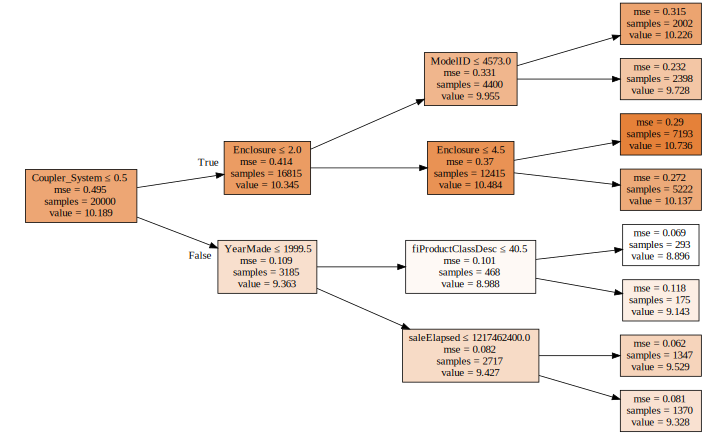

In [31]:
draw_tree(m.estimators_[0], df_trn,precision=3)